# Detection of COVID-19

### Importing Libraries

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import time
import tensorflow as tf
import seaborn as sns


import keras
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.layers import  Flatten, Dense, Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import os 
import cv2

folder1 = "COVID-19_Radiography_Dataset\\COVID\\images"
folder2 = "COVID-19_Radiography_Dataset\\Normal\\images"
folder3 = "COVID-19_Radiography_Dataset\\Viral Pneumonia\\images"

def load_images_from_folder(folder, num):
    images = []
    y = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename));
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = cv2.resize(img,(128,128))
        if img is not None:
            images.append(img)
            y.append(num)
    return images , y

OriginalCovidImages, class1 = load_images_from_folder(folder1,1)
OriginalNormalImages, class3 = load_images_from_folder(folder2,3)
OriginalViralPneumoniaImages, class2 = load_images_from_folder(folder3,2)


FileNotFoundError: [Errno 2] No such file or directory: 'COVID-19_Radiography_Dataset\\COVID\\images'

In [4]:
def reshapeimages(images, y):
    images = np.array(images)
    y = np.array(y).reshape(-1,1)
    return images, y

In [5]:
OriginalCovidImages, class1 = reshapeimages(OriginalCovidImages,class1)
OriginalViralPneumoniaImages, class2 = reshapeimages(OriginalViralPneumoniaImages,class2)
OriginalNormalImages, class3 = reshapeimages(OriginalNormalImages,class3)

print(len(OriginalCovidImages))
print(OriginalCovidImages.shape)
print(class1.shape)

3616
(3616, 128, 128, 3)
(3616, 1)


In [6]:
Covid_train, Covid_test, class1_train, class1_test = train_test_split(OriginalCovidImages,class1, test_size=0.1, random_state=42)
Covid_test, Covid_val, class1_test, class1_val = train_test_split(Covid_test, class1_test, test_size=0.2, random_state=42)
print(Covid_train.shape)
print(Covid_val.shape)
print(Covid_test.shape)

(3254, 128, 128, 3)
(73, 128, 128, 3)
(289, 128, 128, 3)


In [7]:
ViralP_train, ViralP_test, class2_train, class2_test = train_test_split(OriginalViralPneumoniaImages,class2, test_size=0.1, random_state=42)
ViralP_test, ViralP_val, class2_test, class2_val = train_test_split(ViralP_test, class2_test, test_size=0.2, random_state=42)
print(ViralP_train.shape)
print(ViralP_val.shape)
print(ViralP_test.shape)

(1210, 128, 128, 3)
(27, 128, 128, 3)
(108, 128, 128, 3)


In [8]:
Normal_train, Normal_test, class3_train, class3_test = train_test_split(OriginalNormalImages,class3, test_size=0.1, random_state=42)
Normal_test, Normal_val, class3_test, class3_val = train_test_split(Normal_test, class3_test, test_size=0.2, random_state=42)
print(Normal_train.shape)
print(Normal_val.shape)
print(Normal_test.shape)

(9172, 128, 128, 3)
(204, 128, 128, 3)
(816, 128, 128, 3)


## Final Train Test Validation set

In [9]:
X_train = np.concatenate((Covid_train, ViralP_train, Normal_train), axis=0) 
y_train = np.concatenate((class1_train, class2_train, class3_train), axis=0) 
X_test = np.concatenate((Covid_test, ViralP_test, Normal_test), axis=0) 
y_test = np.concatenate((class1_test, class2_test, class3_test), axis=0) 
X_val = np.concatenate((Covid_val, ViralP_val, Normal_val), axis=0) 
y_val = np.concatenate((class1_val, class2_val, class3_val), axis=0) 


In [10]:
print(X_train.shape)
print(X_train)

(13636, 128, 128, 3)
[[[[2.05112366e+02 2.05112366e+02 2.05112366e+02]
   [6.08111877e+01 6.08111877e+01 6.08111877e+01]
   [4.10047913e+01 4.10047913e+01 4.10047913e+01]
   ...
   [3.32031250e-01 3.32031250e-01 3.32031250e-01]
   [3.32031250e-01 3.32031250e-01 3.32031250e-01]
   [3.32031250e-01 3.32031250e-01 3.32031250e-01]]

  [[1.78754044e+02 1.78754044e+02 1.78754044e+02]
   [9.07026672e+00 9.07026672e+00 9.07026672e+00]
   [3.74298096e-02 3.74298096e-02 3.74298096e-02]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[1.09172974e+02 1.09172974e+02 1.09172974e+02]
   [8.64795990e+01 8.64795990e+01 8.64795990e+01]
   [6.91445007e+01 6.91445007e+01 6.91445007e+01]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[1.39426666e+02 1.39426666e+02 1.39426666e

In [11]:
X_train = X_train /255
X_test_scaled = X_test / 255
X_val = X_val/255

In [12]:
print(X_train.shape)
print(X_train)

(13636, 128, 128, 3)
[[[[8.04362237e-01 8.04362237e-01 8.04362237e-01]
   [2.38475248e-01 2.38475248e-01 2.38475248e-01]
   [1.60803109e-01 1.60803109e-01 1.60803109e-01]
   ...
   [1.30208337e-03 1.30208337e-03 1.30208337e-03]
   [1.30208337e-03 1.30208337e-03 1.30208337e-03]
   [1.30208337e-03 1.30208337e-03 1.30208337e-03]]

  [[7.00996220e-01 7.00996220e-01 7.00996220e-01]
   [3.55696753e-02 3.55696753e-02 3.55696753e-02]
   [1.46783568e-04 1.46783568e-04 1.46783568e-04]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[4.28129315e-01 4.28129315e-01 4.28129315e-01]
   [3.39135677e-01 3.39135677e-01 3.39135677e-01]
   [2.71154910e-01 2.71154910e-01 2.71154910e-01]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[5.46771228e-01 5.46771228e-01 5.46771228e

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

for layer in base_model.layers:
    layer.trainable=False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [14]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.00001
decay_steps = 10
decay_rate = 1


lr_schedular = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps, decay_rate)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_schedular)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer = optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=32,epochs=40, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/40
427/427 [==============================] - 803s 2s/step - loss: 0.2415 - accuracy: 0.7878 - val_loss: 0.1679 - val_accuracy: 0.8947
Epoch 2/40
427/427 [==============================] - 740s 2s/step - loss: 0.1250 - accuracy: 0.9175 - val_loss: 0.1130 - val_accuracy: 0.9211
Epoch 3/40
427/427 [==============================] - 742s 2s/step - loss: 0.0957 - accuracy: 0.9363 - val_loss: 0.0967 - val_accuracy: 0.9309
Epoch 4/40
427/427 [==============================] - 716s 2s/step - loss: 0.0804 - accuracy: 0.9479 - val_loss: 0.0898 - val_accuracy: 0.9276
Epoch 5/40
427/427 [==============================] - 856s 2s/step - loss: 0.0704 - accuracy: 0.9538 - val_loss: 0.0809 - val_accuracy: 0.9375
Epoch 6/40
427/427 [==============================] - 773s 2s/step - loss: 0.0633 - accuracy: 0.9583 - val_loss: 0.0832 - val_accuracy: 0.9408
Epoch 7/40
427/427 [==============================] - 735s 2s/step - loss: 0.0567 - accuracy: 0.9646 - val_loss: 0.0751 - val_accuracy: 0.9375

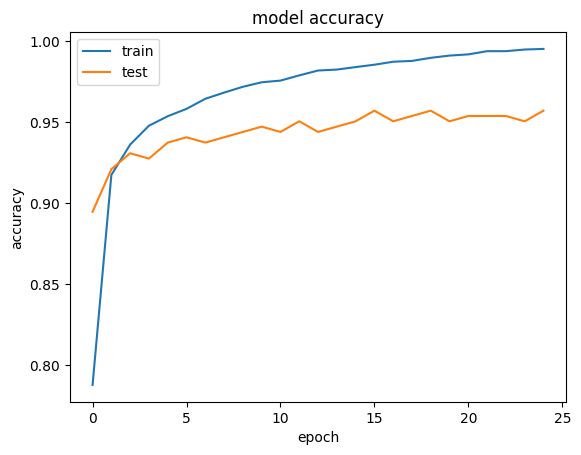

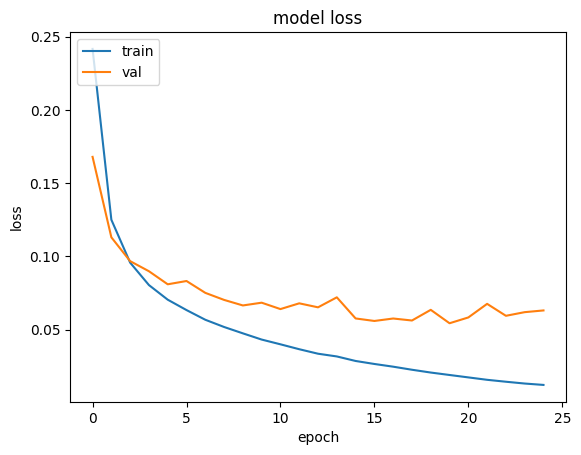

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [17]:
model.save('model2.h5')

In [18]:
model1 = load_model('model2.h5')

In [19]:
y_hat = model1.predict(X_test_scaled)

38/38 [==============================] - 60s 2s/step


In [20]:
print(y_hat)

[[1.9765941e-06 9.9965376e-01 7.4115457e-07 6.9136918e-04]
 [1.6664690e-06 9.9811924e-01 6.1077042e-04 1.7409058e-03]
 [6.9802463e-06 9.9986905e-01 1.5196647e-02 3.2884716e-05]
 ...
 [1.1278242e-05 4.1032836e-06 4.6211392e-02 9.7505212e-01]
 [3.5185703e-06 2.8998388e-03 7.9985120e-06 9.9709433e-01]
 [6.1185815e-06 2.0181824e-05 2.6520711e-06 9.9998617e-01]]


In [21]:
y_pred = y_hat.round()
print(y_pred)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [22]:
print(y_test)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.966199505358615


In [24]:
labels = [".",'Covid', 'Viral Pneumonia', 'Normal']
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
print(f"Accuracy: {accuracy}")

                 precision    recall  f1-score   support

              .       0.00      0.00      0.00         0
          Covid       0.95      0.96      0.95       289
Viral Pneumonia       0.94      0.98      0.96       108
         Normal       0.98      0.98      0.98       816

      micro avg       0.97      0.97      0.97      1213
      macro avg       0.72      0.73      0.72      1213
   weighted avg       0.97      0.97      0.97      1213
    samples avg       0.97      0.97      0.97      1213

Accuracy: 0.966199505358615


c:\Users\Naziya Mahimkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Naziya Mahimkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Naziya Mahimkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Pink')

tick_labels = [".",'Covid', 'Viral Pneumonia', 'Normal']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
